In [27]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

Kasutame teeki `sklearn` selleks et treenida meie mudelit. Andmetid võttame sealsamast.

In [28]:
from sklearn.datasets import load_iris
irisdata_sl = load_iris(return_X_y = False, as_frame=True)

In [29]:
irisdata = irisdata_sl['data']
target = irisdata_sl['target']

In [30]:
irisdata.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
list(irisdata_sl.target_names)

['setosa', 'versicolor', 'virginica']

In [32]:
irisdata = irisdata.rename(columns={"sepal length (cm)": "sepal_length", "sepal width (cm)": "sepal_width", 
                         "petal length (cm)": "petal_length", "petal width (cm)": "petal_width"})

Jätame osa andmetest välja, selleks et hiljem saaks kasutada neid ennustamiseks.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(irisdata, target, test_size=0.2, random_state=42)

In [49]:
irisdata = X_train.copy()
irisdata["class"] = y_train

dict_labels = {0 : 'Iris setosa', 1 : 'Iris versicolor', 2: 'Iris virginica'}
irisdata=irisdata.replace({"class": dict_labels})

Joonistame hajuvusdiagrammi. Selleks kasutame teeki `seaborn`.

<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

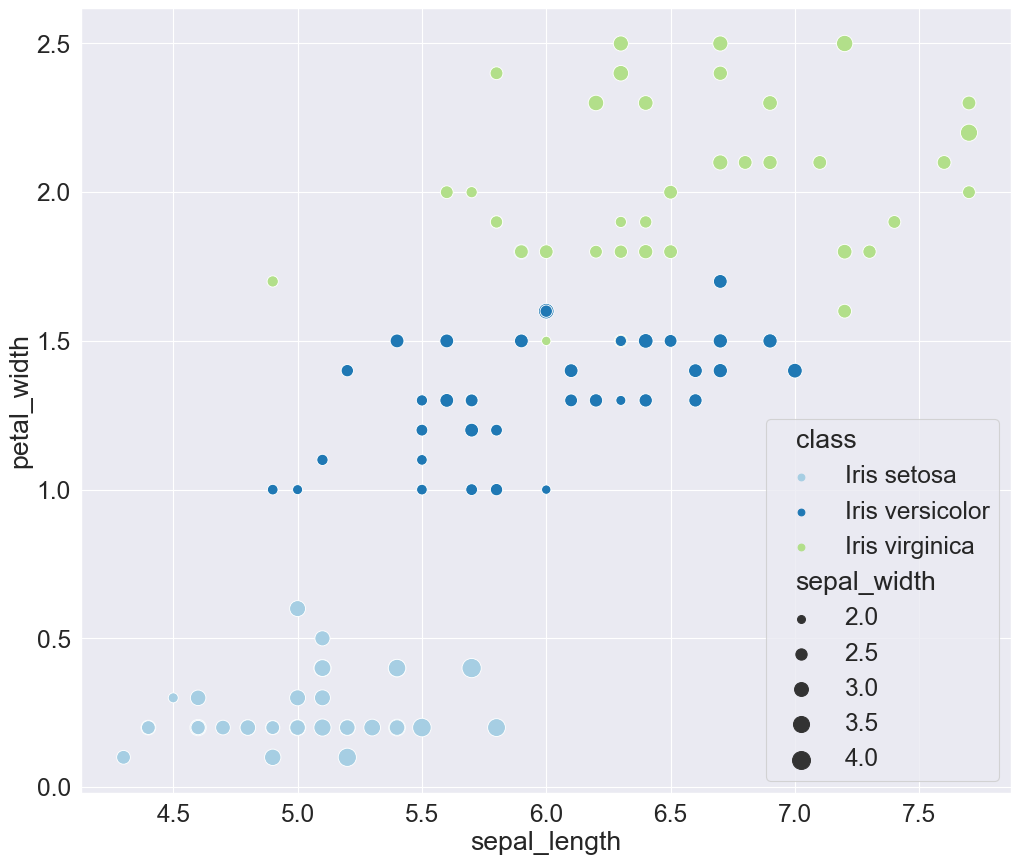

In [40]:
from matplotlib.pyplot import figure

figure(figsize=(15, 13), dpi=80)

sns.set(font_scale = 2)
sns.set_palette(sns.color_palette("Paired"))
sns.scatterplot(x="sepal_length", y="petal_width", size="sepal_width",sizes=(50, 300), data=irisdata, hue="class")

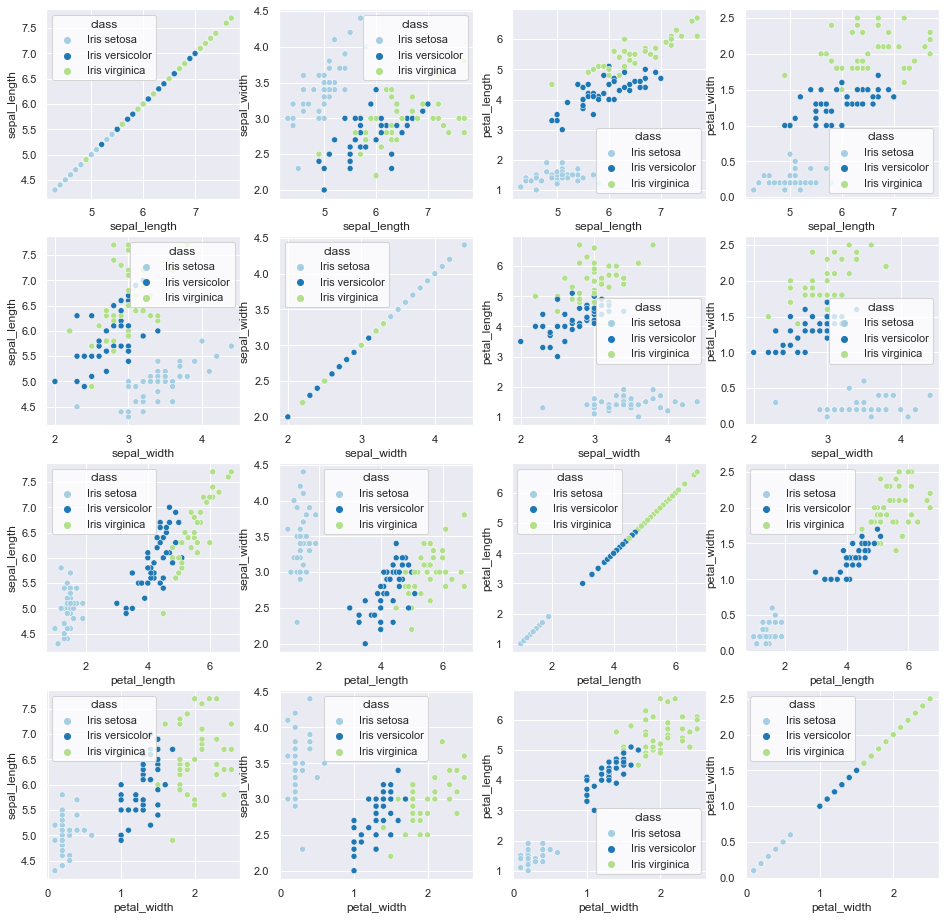

In [41]:
import matplotlib.pyplot as plt

n = 4
sns.set(font_scale = 1)


fig, ax = plt.subplots(n, n, figsize=(16, 16))

colors = ['#a6cee3', '#1f78b4', '#b2df8a']

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for x in range(n):
    for y in range(n):
        
        sns.set_palette(sns.color_palette(colors))
        sns.set_style("whitegrid")
        sns.scatterplot(x=features[x], y=features[y], data=irisdata, hue="class", ax = ax[x, y])

plt.show()

Nii lihtsalt käib mudeli treenimine. Meil on vaja treeningandmeid `X_train`, kus sisalduvad tunnused (features) ja märgendid `y_train`, kust mudel saab teada klasse. 

In [42]:
from sklearn.tree import DecisionTreeClassifier

irismodel = DecisionTreeClassifier(random_state=0, criterion='gini')
irismodel = irismodel.fit(X_train, y_train)

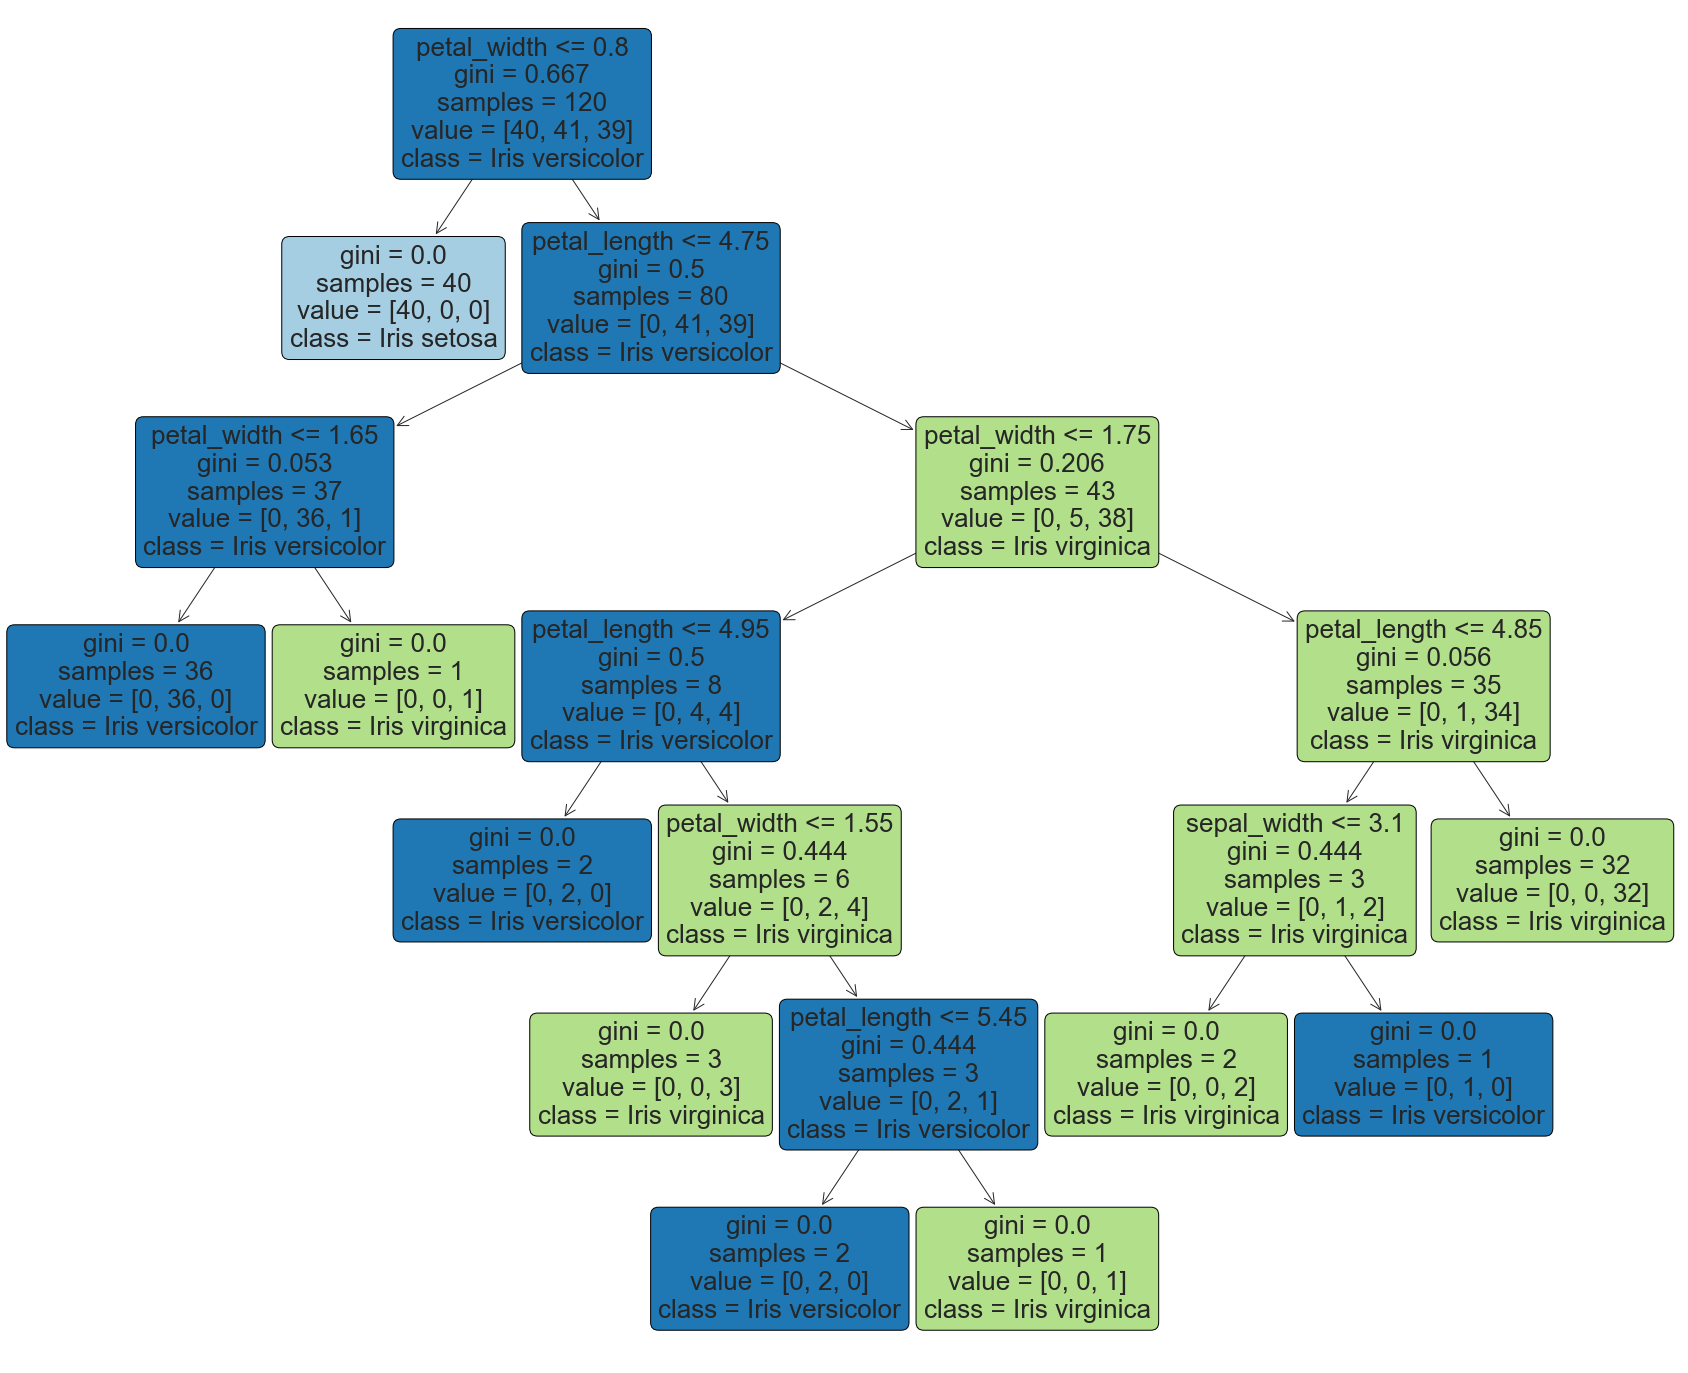

In [45]:
from matplotlib.colors import ListedColormap, to_rgb
import numpy as np
from sklearn.tree import plot_tree
from sklearn import tree

plt.figure(figsize=(30,25))

artists = tree.plot_tree(irismodel, 
                         feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                         class_names=['Iris setosa',  'Iris versicolor', 'Iris virginica'],
                         filled=True, rounded=True)
colors = ['#a6cee3', '#1f78b4', '#b2df8a']
ind= 0
for artist, impurity, value in zip(artists, irismodel.tree_.impurity, irismodel.tree_.value):
    # let the max value decide the color; whiten the color depending on impurity (gini)
    r, g, b = to_rgb(colors[np.argmax(value)])
    
    ind=ind+1
    f = impurity * 2 # for N colors: f = impurity * N/(N-1) if N>1 else 0
    artist.get_bbox_patch().set_facecolor((r, g, b))
    artist.get_bbox_patch().set_edgecolor('black')

In [47]:
y_pred = irismodel.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [68]:
X_test["class"] = y_test
X_train["class"] = y_train
X_train["train_or_test"] = "train"
X_test["train_or_test"] = "test"

In [69]:
train_and_test = pd.concat([X_train, X_test])

In [70]:
train_and_test=train_and_test.replace({"class": dict_labels})

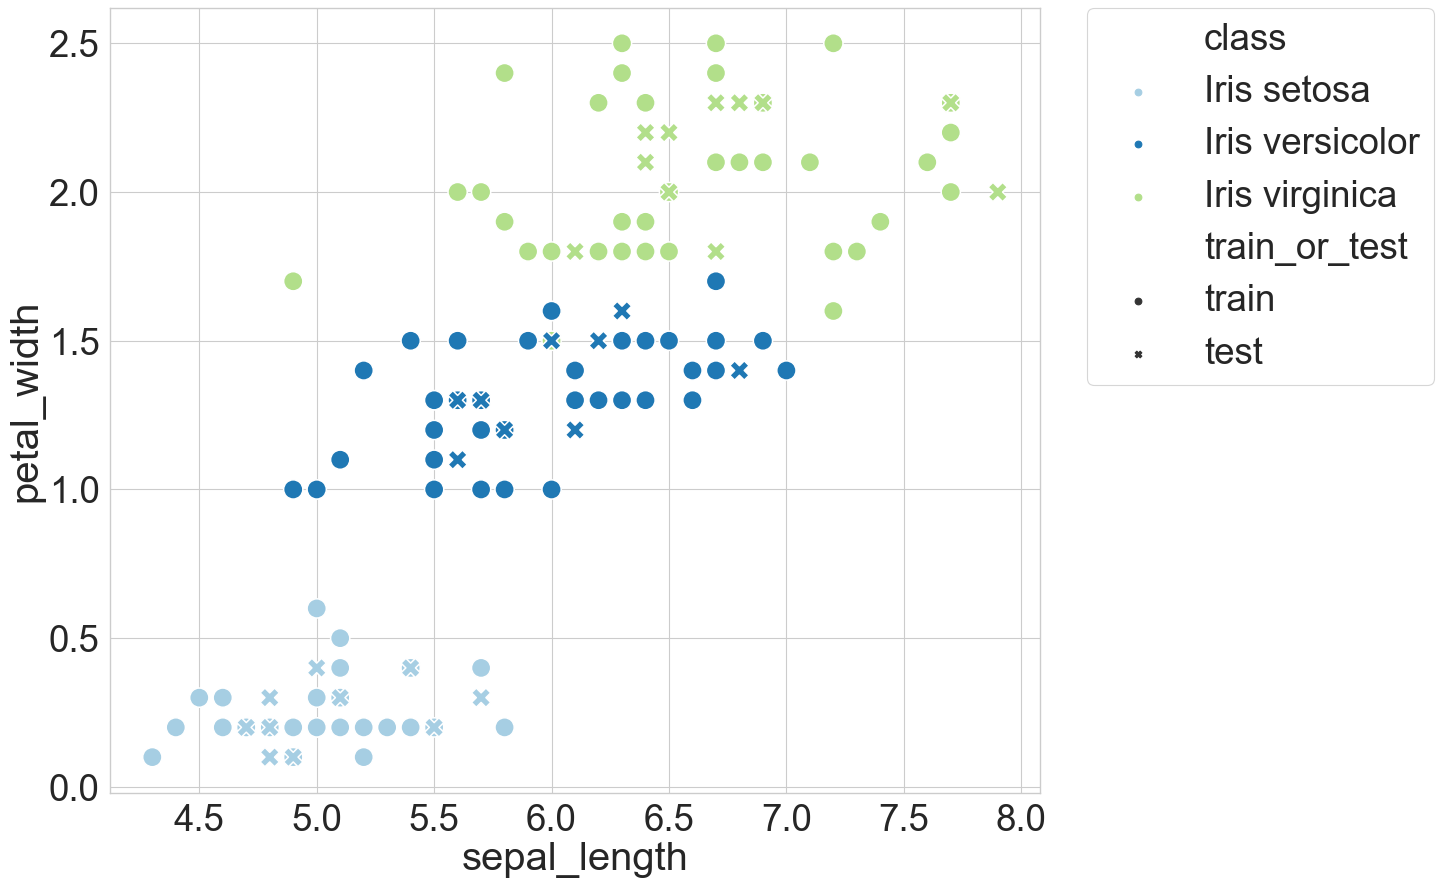

In [71]:
figure(figsize=(15, 13), dpi=80)
sns.set(font_scale = 3)
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#aeb4bd']

sns.set_palette(sns.color_palette(colors))
sns.set_style("whitegrid")

sns.scatterplot(x="sepal_length", y="petal_width", data=train_and_test, s = 300, hue="class", style = "train_or_test")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

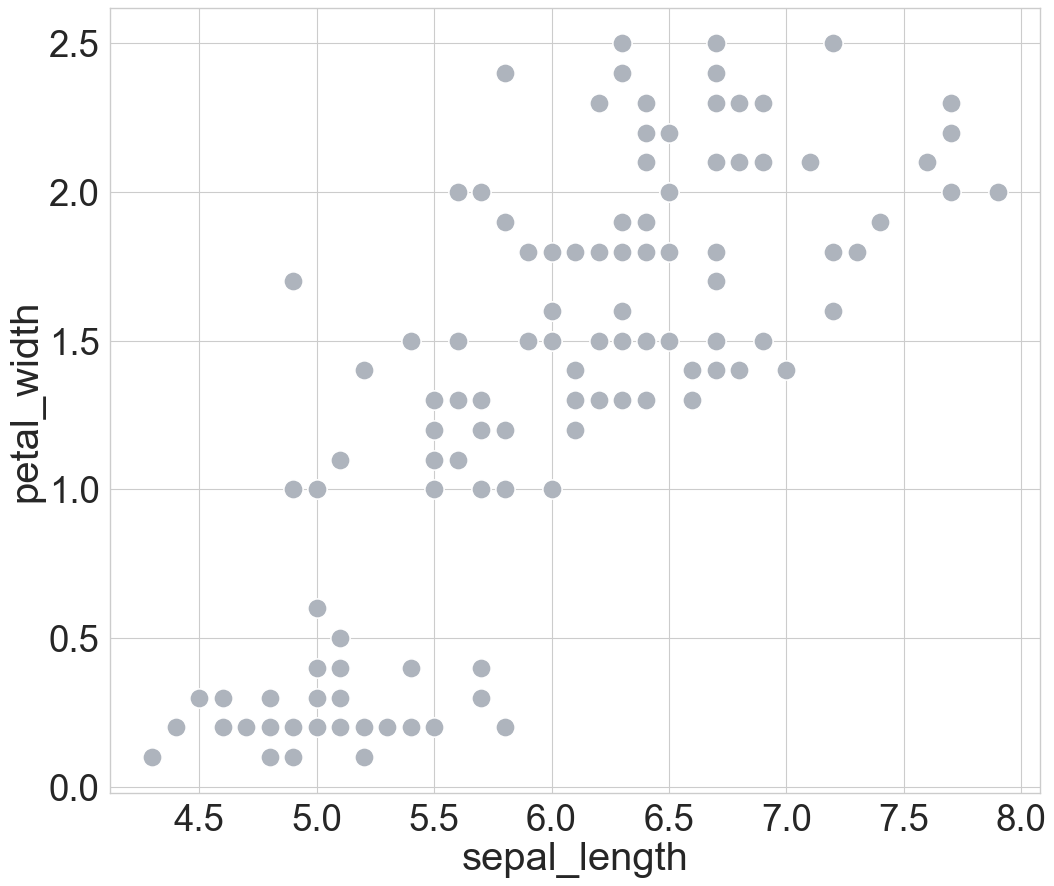

In [72]:
figure(figsize=(15, 13), dpi=80)
sns.set(font_scale = 3)
colors = ['#aeb4bd']

sns.set_palette(sns.color_palette(colors))
sns.set_style("whitegrid")

sns.scatterplot(x="sepal_length", y="petal_width", data=train_and_test, s = 300)


In [74]:
unsupervised_data = train_and_test.iloc[:,0:4] 


In [85]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(unsupervised_data)

labels = kmeans.labels_

<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

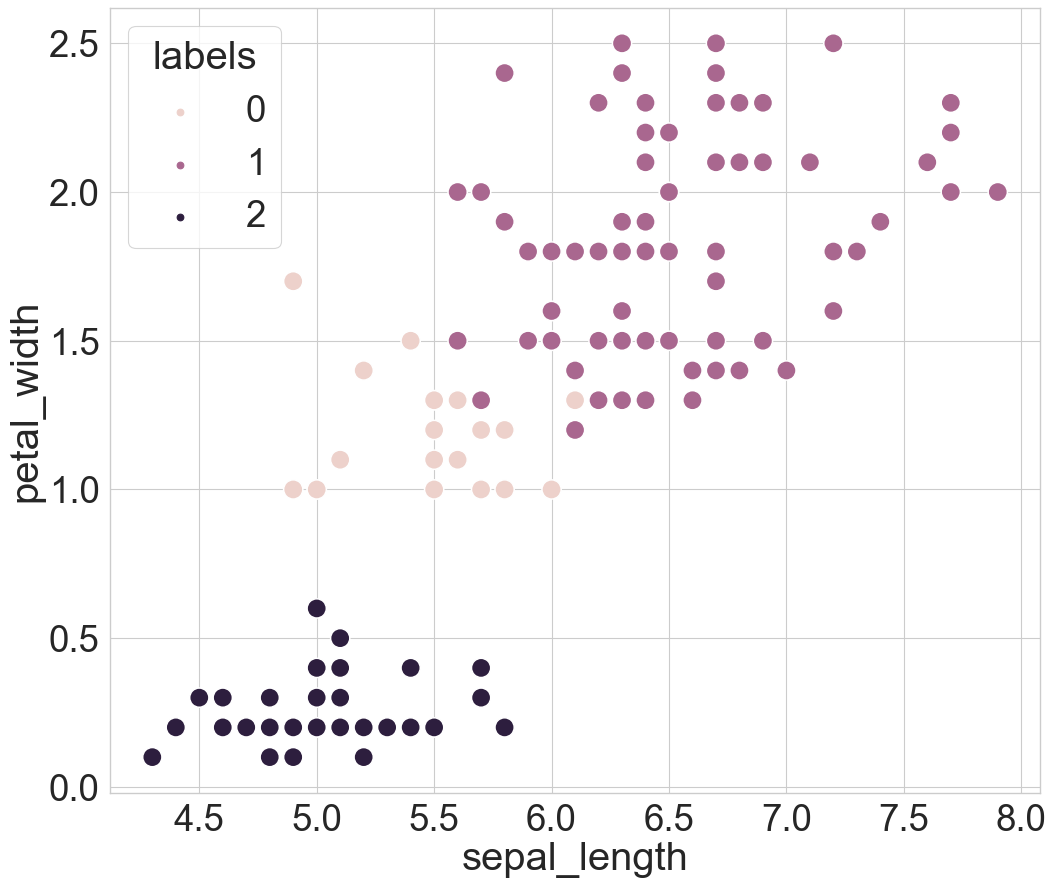

In [86]:
figure(figsize=(15, 13), dpi=80)

unsupervised_data["labels"] = labels
sns.set_style("whitegrid")

sns.scatterplot(x="sepal_length", y="petal_width", data=unsupervised_data, s = 300, hue="labels")
